In [87]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



Analise exploratoria e tratameto de dados

>nesse caso iremos realizar uma limpeza nos dados e começar a traçar nosso modelo de rede neural.

> o codigo será comentado para sabermos o passo a passo.




In [88]:
df = pd.read_csv('/content/dados_com_fraudes.csv')

In [89]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,valor_apolice,data_sinistro,tipo_procedimento,frequencia_anual,fraudulent
0,0,19,female,27.900,0,yes,southwest,1900.082,2023-07-31,restauração,1,0
1,1,18,male,33.770,1,no,southeast,196.459,2023-05-01,aparelho,1,0
2,2,28,male,33.000,3,no,southeast,491.626,2022-11-22,canal,1,0
3,3,33,male,22.705,0,no,northwest,2794.228,2022-09-20,aparelho,1,0
4,4,32,male,28.880,0,no,northwest,457.006,2023-01-29,aparelho,1,0


com isso temos temos as informações de

*   idade
*   sexo

*   imc

*   numero de filhos
*   fumante ou não


*   região
*   valor médico
*   valor da apolice

*   data do sinistro
*   tipo do procedimento

*   frequencia





In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1338 non-null   int64  
 1   age                1338 non-null   int64  
 2   sex                1338 non-null   object 
 3   bmi                1338 non-null   float64
 4   children           1338 non-null   int64  
 5   smoker             1338 non-null   object 
 6   region             1338 non-null   object 
 7   valor_apolice      1338 non-null   float64
 8   data_sinistro      1338 non-null   object 
 9   tipo_procedimento  1338 non-null   object 
 10  frequencia_anual   1338 non-null   int64  
 11  fraudulent         1338 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 125.6+ KB


In [91]:
df.describe()

,Unnamed: 0,age,bmi,children,valor_apolice,frequencia_anual,fraudulent
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,1800.266845,8.470105,0.038864
std,386.391641,14.049960,6.098187,1.205493,1690.100133,6.015270,0.193343
min,0.000000,18.000000,15.960000,0.000000,108.236000,1.000000,0.000000
25%,334.250000,27.000000,26.296250,0.000000,559.158250,4.000000,0.000000
50%,668.500000,39.000000,30.400000,1.000000,1324.022500,8.000000,0.000000
75%,1002.750000,51.000000,34.693750,2.000000,2259.403500,11.000000,0.000000
max,1337.000000,64.000000,53.130000,5.000000,9746.344000,37.000000,1.000000


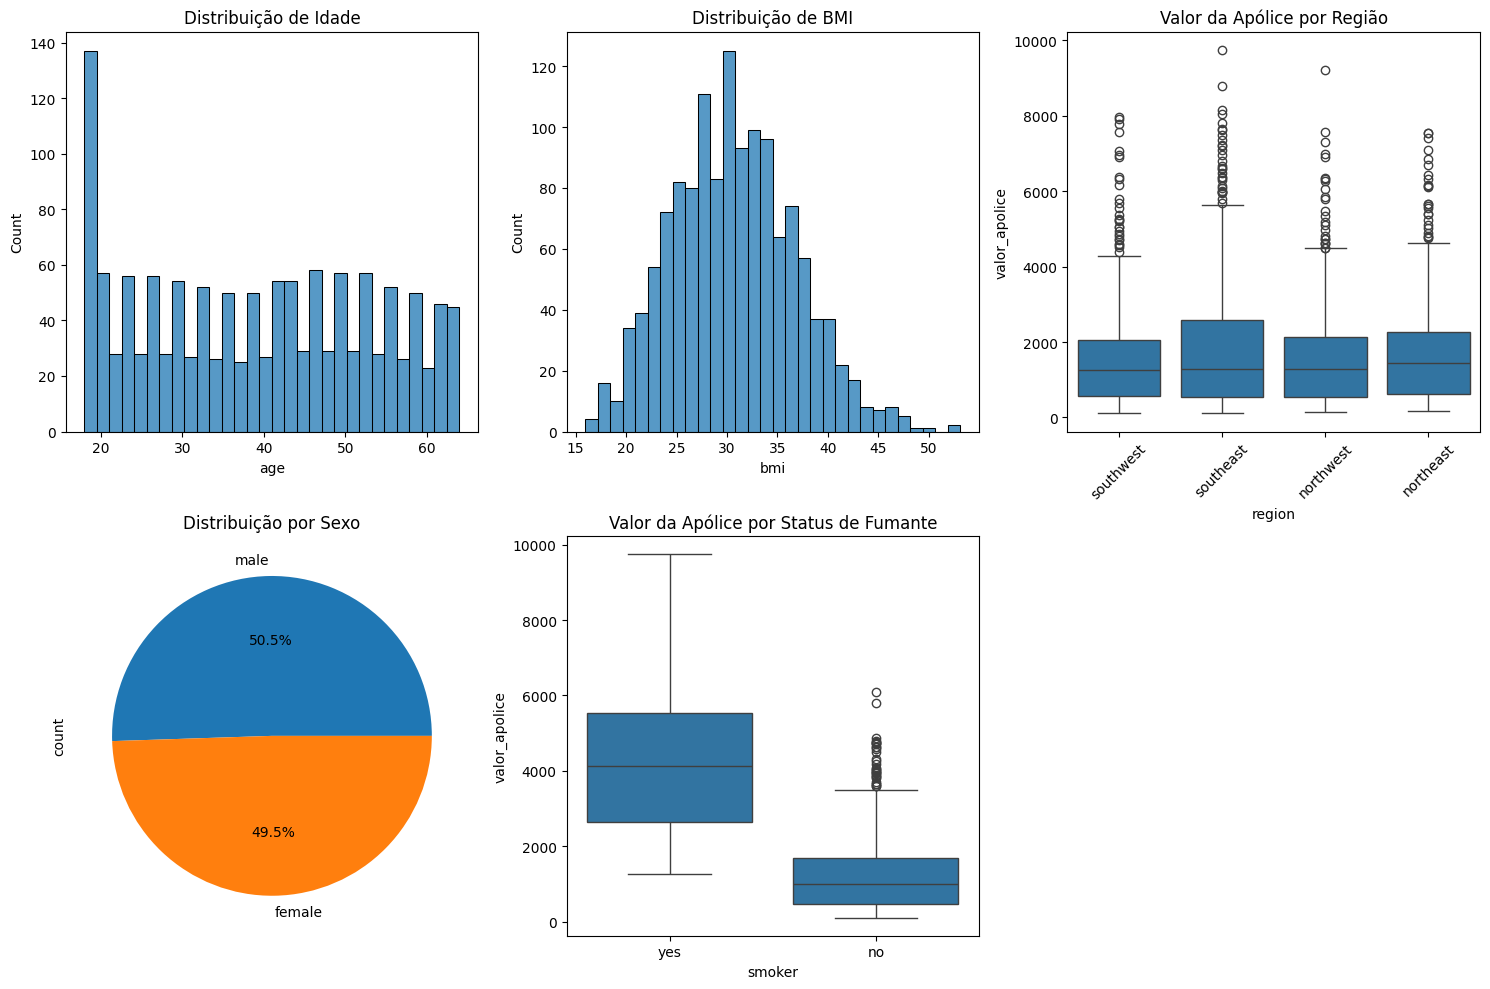

In [92]:
# Análise exploratória dos dados
plt.figure(figsize=(15, 10))

# Distribuição de idade
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribuição de Idade')

# Distribuição de BMI
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='bmi', bins=30)
plt.title('Distribuição de BMI')

# Valor da apólice por região
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='region', y='valor_apolice')
plt.xticks(rotation=45)
plt.title('Valor da Apólice por Região')

# Distribuição por sexo
plt.subplot(2, 3, 4)
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição por Sexo')

# Valor da apólice para fumantes e não fumantes
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='smoker', y='valor_apolice')
plt.title('Valor da Apólice por Status de Fumante')

plt.tight_layout()
plt.show()


com isso vemos que temos pacientes que foram mais de 37 vezes ao dentista no ano.           o fato interessante tambem é o de que o valor médio das apolices chega em 1690 reais , o que demonstra ser um valor um pocouco mais a cima do que estavamos esperando.

In [93]:
# verificação se temos alguma celula vazia.
df.isnull().sum()

,0
Unnamed: 0,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
valor_apolice,0
data_sinistro,0
tipo_procedimento,0


In [94]:
df.drop(columns = ["Unnamed: 0"] , axis = 0 , inplace = True)

In [95]:
df.head()

,age,sex,bmi,children,smoker,region,valor_apolice,data_sinistro,tipo_procedimento,frequencia_anual,fraudulent
0,19,female,27.900,0,yes,southwest,1900.082,2023-07-31,restauração,1,0
1,18,male,33.770,1,no,southeast,196.459,2023-05-01,aparelho,1,0
2,28,male,33.000,3,no,southeast,491.626,2022-11-22,canal,1,0
3,33,male,22.705,0,no,northwest,2794.228,2022-09-20,aparelho,1,0
4,32,male,28.880,0,no,northwest,457.006,2023-01-29,aparelho,1,0


In [96]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('/content/dados_com_fraudes.csv')

# Definir valores padronizados para cada tipo de procedimento
# Exemplo: ajuste conforme os valores típicos de cada procedimento no seu contexto
procedimento_valores = {
    'Limpeza Dental': 100,
    'Aparelho Ortodôntico': 1300,
    'Extração dental': 400,
    'Canal': 800,
    'Aplicação de protese':3000,
    'Panoramica': 200,
    'Cirurgia': 5000
}

# Substituir os valores no campo 'valor_apolice' com base nos valores padronizados
# Aplica uma variação aleatória de até 10% para simular uma leve variação aceitável
import numpy as np

df['valor_apolice'] = df['tipo_procedimento'].apply(
    lambda x: procedimento_valores.get(x, 200) * (1 + np.random.uniform(-0.1, 0.1))
)

# Visualizar as alterações
print(df[['tipo_procedimento', 'valor_apolice']].head())


  tipo_procedimento  valor_apolice
0       restauração     209.949752
1          aparelho     183.714951
2             canal     198.630407
3          aparelho     218.771081
4          aparelho     200.760973


In [97]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,valor_apolice,data_sinistro,tipo_procedimento,frequencia_anual,fraudulent
0,0,19,female,27.900,0,yes,southwest,209.949752,2023-07-31,restauração,1,0
1,1,18,male,33.770,1,no,southeast,183.714951,2023-05-01,aparelho,1,0
2,2,28,male,33.000,3,no,southeast,198.630407,2022-11-22,canal,1,0
3,3,33,male,22.705,0,no,northwest,218.771081,2022-09-20,aparelho,1,0
4,4,32,male,28.880,0,no,northwest,200.760973,2023-01-29,aparelho,1,0


In [98]:
df.sample(10
)

,Unnamed: 0,age,sex,bmi,children,smoker,region,valor_apolice,data_sinistro,tipo_procedimento,frequencia_anual,fraudulent
856,856,48,female,33.110,0,yes,southeast,196.563484,2023-09-11,canal,8,0
1103,1103,58,male,36.080,0,no,southeast,208.015755,2022-11-14,canal,10,0
460,460,49,female,36.630,3,no,southeast,183.203291,2022-07-24,limpeza,6,0
982,982,31,male,25.900,3,yes,southwest,204.796600,2023-03-10,restauração,13,0
833,833,58,male,34.390,0,no,northwest,205.321968,2022-12-17,limpeza,9,0
826,826,56,male,31.790,2,yes,southeast,211.671954,2022-04-03,extração,7,0
1272,1272,43,male,25.520,5,no,southeast,181.168658,2023-04-27,limpeza,15,0
402,402,64,female,32.965,0,no,northwest,190.553889,2022-01-24,limpeza,5,0
655,655,52,female,25.300,2,yes,southeast,217.365324,2023-02-07,limpeza,9,0
340,340,24,female,27.600,0,no,southwest,213.909173,2022-01-18,limpeza,5,0


In [99]:
# Pré-processamento dos dados
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['tipo_procedimento'] = le.fit_transform(df['tipo_procedimento'])

aqui reaizamos a aplicação do lable encodoer para tratar com dados tabulares assim nossa rede cosnegue ter uma melhor percepção.

---



---



In [101]:
X = df.drop(['fraudulent', 'data_sinistro'], axis=1)  # Removendo a coluna target e a data original
y = df['fraudulent']


In [102]:
# Dividir os dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Criar o modelo de rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
df['data_sinistro'] = pd.to_datetime(df['data_sinistro'])
df['year'] = df['data_sinistro'].dt.year
df['month'] = df['data_sinistro'].dt.month
df['day'] = df['data_sinistro'].dt.day


X = df.drop(['valor_apolice', 'data_sinistro'], axis=1)  # Replace 'date_column'
y = df['valor_apolice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [105]:
# Criar o modelo de rede neural
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Now uses the updated X_train shape
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

In [114]:


# Avaliar o modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('Erro médio absoluto:', mae)

# Fazer previsões
y_pred = model.predict(X_test)



Erro médio absoluto: 10.123845100402832
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [115]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nAcurácia no teste: {accuracy:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.2484 - mae: 9.9618 

Acurácia no teste: 10.1238


vamos selecionar qual sera nosso alvo.  

para isso vamos realizar uma separação simples em X e Y assim como nosso modelos de ML